# Today's Market

In this notebook, we'll take a look at today's market.

In [20]:
import pandas as pd
from fidap import fidap_client
import config

In [21]:
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

## Aggregate statistics

First, let's get some aggregate statistics - how many companies there are, the total market cap, and the historical average volume.

In [79]:
df = fidap.sql("""SELECT count("ticker") ticker_count, 
       sum("marketcap") marketcap_sum, 
       sum("marketcap") / 1e18 marketcap_sum_tr, 
       sum("mc_ch") mc_ch_sum, 
       sum("mc_ch")/1e15 mc_ch_sum_bn, 
       (sum("mc_ch") / sum("marketcap")) *100 as pct_mc_ch,
       avg("pc_1d") *100 pc_1d_avg,
       stddev("pc_1d") * 100 dispersion,
       sum("revenueusd") as revenue
FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers"
WHERE "marketcap" > 100e6;""")
df

,ticker_count,marketcap_sum,marketcap_sum_tr,mc_ch_sum,mc_ch_sum_bn,pct_mc_ch,pc_1d_avg,dispersion,revenue
0,4900,5.011881e+19,50.118813,138359266900000000,138.359267,0.276063,0.888332,4.795466,4975194415395


In more readable terms - 

In [80]:
print("""
Number of companies: {}
Total market cap: {} trillion
""".format(df.loc[0,'ticker_count'], df.loc[0,'marketcap_sum_tr']))


Number of companies: 4900
Total market cap: 50.1188131 trillion



## Top companies

We can look at the top companies in several ways - by market cap, revenue, assets, etc. Here are some views - 

### Top 10 By Market Cap

In [65]:
df_marketcap = fidap.sql("""SELECT "ticker", "name",  "marketcap"/1e18 as "marketcap_usd_trillion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap" DESC LIMIT 10;""")
df_marketcap

,ticker,name,marketcap_usd_trillion
0,AAPL,APPLE INC,2.014404
1,MSFT,MICROSOFT CORP,1.737349
2,AMZN,AMAZON COM INC,1.548441
3,GOOGL,ALPHABET INC,1.366448
4,FB,FACEBOOK INC,0.826137
5,BABA,ALIBABA GRP HLDG LTD,0.650430
6,TSLA,TESLA INC,0.628579
7,BRK.B,BERKSHIRE HATHAWAY INC,0.579195
8,JPM,JPMORGAN CHASE & CO,0.473411
9,JNJ,JOHNSON & JOHNSON,0.420694


#### Top 10 By Revenue

In [66]:
df_revenue = fidap.sql("""SELECT "ticker", "name", "revenueusd"/1e9 as "revenue_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "revenueusd" IS NOT NULL ORDER BY "revenueusd" DESC LIMIT 10;""")
df_revenue

,ticker,name,revenue_usd_billion
0,WMT,WALMART INC,152.079000
1,AMZN,AMAZON COM INC,125.555000
2,AAPL,APPLE INC,111.439000
3,BRK.B,BERKSHIRE HATHAWAY INC,103.735000
4,TM,TOYOTA MTR CORP,78.744271
5,CVS,CVS HLTH CORP,69.554000
6,UNH,UNITEDHEALTH GRP INC,65.467000
7,MCK,MCKESSON CORP,62.599000
8,GOOGL,ALPHABET INC,56.898000
9,ABC,AMERISOURCEBERGEN CORP,52.516556


#### Top 10 Market Cap Percent Gainers

In [70]:
df_mc_pct_gainers = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e15 as "marketcap_usd_billion", ROUND(100*DIV0("mc_ch","marketcap"),2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap_pct_change" DESC LIMIT 10;""")
df_mc_pct_gainers

,ticker,name,marketcap_usd_billion,marketcap_pct_change
0,ARNI,ARNO THERA INC,0.0005,150.00
1,PFTI,PURADYN FILTER TECH INC,0.0010,66.67
2,CLVS,CLOVIS ONCOLOGY INC,0.8216,47.74
3,HOFV,HALL OF FAME RESORT & ENTMT CO,0.3331,46.52
4,MDIT,MEDITE CANCER DIAG INC,0.0023,44.44
5,FHTX,FOGHORN THERA INC,0.5935,36.61
6,SNES,SENESTECH INC,0.0093,35.12
7,MRKR,MARKER THERA INC,0.1228,34.44
8,STON,STONEMOR INC,0.3206,32.04
9,RIII,RENAVOTIO INC,0.0081,31.58


#### Top 10 Marketcap Percent Losers

In [71]:
df_mc_pct_losers = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e15 as "marketcap_usd_billion", ROUND(100*DIV0("mc_ch","marketcap"),2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "marketcap_pct_change" ASC LIMIT 10;""")
df_mc_pct_losers

,ticker,name,marketcap_usd_billion,marketcap_pct_change
0,IDRA,IDERA PHARMA INC,0.0837,-62.00
1,CRGS,CURAEGIS TECH INC,0.0006,-60.00
2,KOAN,RESONATE BLENDS INC,0.0104,-33.87
3,ESMC,ESCALON MEDI CORP,0.0024,-33.12
4,MOJO,MOJO ORGANICS INC,0.0043,-26.32
5,GLTC,GELTECH SOL INC,0.0040,-25.53
6,NUZE,NUZEE INC,0.0599,-21.37
7,RYMM,ROYAL MINES & MINERALS CORP,0.0037,-21.05
8,SDRLF,SEADRILL LTD,0.0241,-20.00
9,RSPI,RESPIRERX PHARMA INC,0.0036,-17.65


#### Top 10 Marketcap Gainers

In [72]:
df_mc_gains = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e15 as "marketcap_usd_trillion", "mc_ch"/1e15 as "mc_ch_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "mc_ch_usd_billion" DESC LIMIT 10;""")
df_mc_gains

,ticker,name,marketcap_usd_trillion,mc_ch_usd_billion
0,FB,FACEBOOK INC,826.1375,34.069054
1,AMZN,AMAZON COM INC,1548.4414,24.019330
2,BABA,ALIBABA GRP HLDG LTD,650.4304,9.243523
3,HD,HOME DEPOT INC,311.2453,6.529160
4,WMT,WALMART INC,371.1210,4.938384
5,FDX,FEDEX CORP,74.1843,4.524085
6,AVGO,BROADCOM INC,193.7231,4.303103
7,TGT,TARGET CORP,93.5155,4.134030
8,BEKE,KE HLDGS INC,75.7816,4.001628
9,ABT,ABBOTT LAB,213.0264,3.859762


#### Top 10 Marketcap Losers

In [73]:
df_mc_loses = fidap.sql("""SELECT "ticker", "name", "marketcap"/1e15 as "marketcap_usd_trillion", "mc_ch"/1e15 as "mc_ch_usd_billion" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL ORDER BY "mc_ch_usd_billion" ASC LIMIT 10;""")
df_mc_loses

,ticker,name,marketcap_usd_trillion,mc_ch_usd_billion
0,V,VISA INC,403.9335,-25.188638
1,MA,MASTERCARD INC,354.1436,-10.122524
2,AAPL,APPLE INC,2014.4036,-9.024956
3,NKE,NIKE INC,216.7516,-8.599211
4,JPM,JPMORGAN CHASE & CO,473.4107,-7.537335
5,WFC,WELLS FARGO & CO,163.8346,-4.737193
6,CB,CHUBB LTD,71.6893,-3.794889
7,BAC,BANK OF AMERICA CORP,332.6367,-3.502338
8,BRK.B,BERKSHIRE HATHAWAY INC,579.1954,-3.372484
9,UNP,UNION PCFC CORP,141.2000,-2.989747


#### Top 10 Industries By Marketcap

<AxesSubplot:ylabel='industry'>

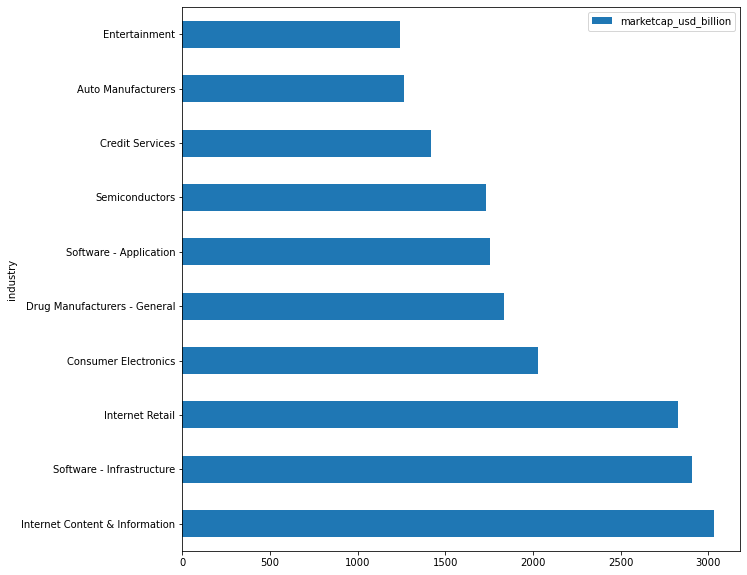

In [98]:
df_industries = fidap.sql("""SELECT "industry", COUNT("industry") as "count",SUM("marketcap"/1e15) as "marketcap_usd_billion", ROUND((SUM("mc_ch"/1e15)/"marketcap_usd_billion")*100,2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "industry" ORDER BY "marketcap_usd_billion" DESC LIMIT 10;""")
df_industries.set_index("industry", inplace=True)
df_industries.plot.barh(y='marketcap_usd_billion', figsize=(10,10))

#### Top Sectors by Marketcap

<AxesSubplot:title={'center':'Marketcap by Sector'}, ylabel='marketcap_usd_billion'>

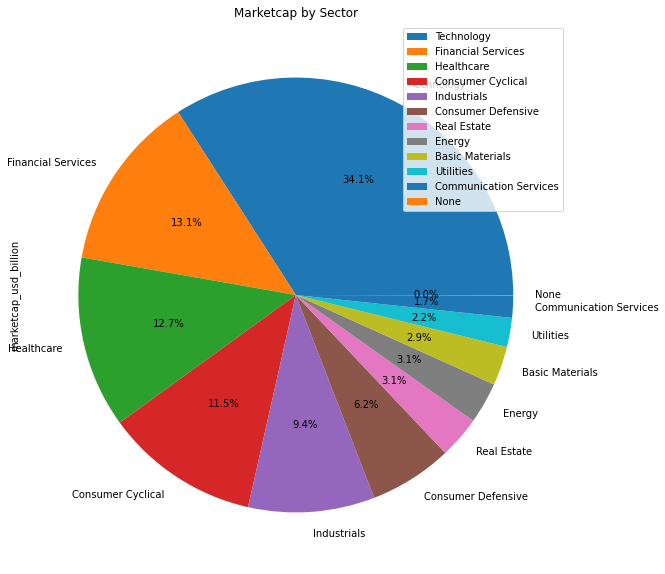

In [90]:
df_sectors = fidap.sql("""SELECT "sector", COUNT("sector") as "count", SUM("marketcap"/1e15) as "marketcap_usd_billion", ROUND((SUM("mc_ch"/1e15)/"marketcap_usd_billion")*100,2) as "marketcap_pct_change" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "sector" ORDER BY "marketcap_usd_billion" DESC;""")
df_sectors.set_index("sector", inplace=True)
df_sectors.plot.pie(y='marketcap_usd_billion', figsize=(10,10), title="Marketcap by Sector", autopct='%1.1f%%')